In [71]:
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats


In [2]:
data = pd.read_csv('hmelq.csv')

In [3]:
data.sample(10)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
2778,0,21900,NaN,80239.0,DebtCon,Sales,5.0,0.0,0.0,402.09,0.0,23.0,21.990
2876,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2334,0,5600,29648.0,39907.0,HomeImp,ProfEx,11.0,0.0,0.0,180.56,0.0,13.0,21.555
333,0,17400,44479.0,78121.0,DebtCon,Mgr,1.0,0.0,0.0,117.32,0.0,9.0,27.134
1353,0,52700,23905.0,82670.0,HomeImp,Other,4.0,2.0,0.0,253.35,7.0,14.0,42.837
3078,1,10000,34350.0,54146.0,DebtCon,Other,3.0,0.0,0.0,144.42,0.0,18.0,31.539
2529,0,7000,58114.0,93391.0,HomeImp,ProfEx,6.0,0.0,0.0,200.08,1.0,24.0,31.737
2503,0,17800,58942.0,91483.0,HomeImp,ProfEx,5.0,0.0,0.0,123.74,0.0,13.0,28.156
3496,1,7000,38800.0,53500.0,HomeImp,ProfEx,15.0,0.0,0.0,96.37,0.0,18.0,NaN
674,0,17900,62697.0,89848.0,DebtCon,Office,7.0,0.0,0.0,113.06,0.0,19.0,24.072


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [5]:
data = data.drop(columns=['reason','job'])#object degerleri atiyorum

In [6]:
data = data.dropna()

In [56]:
data.isnull().sum()

bad        0
loan       0
mortdue    0
value      0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

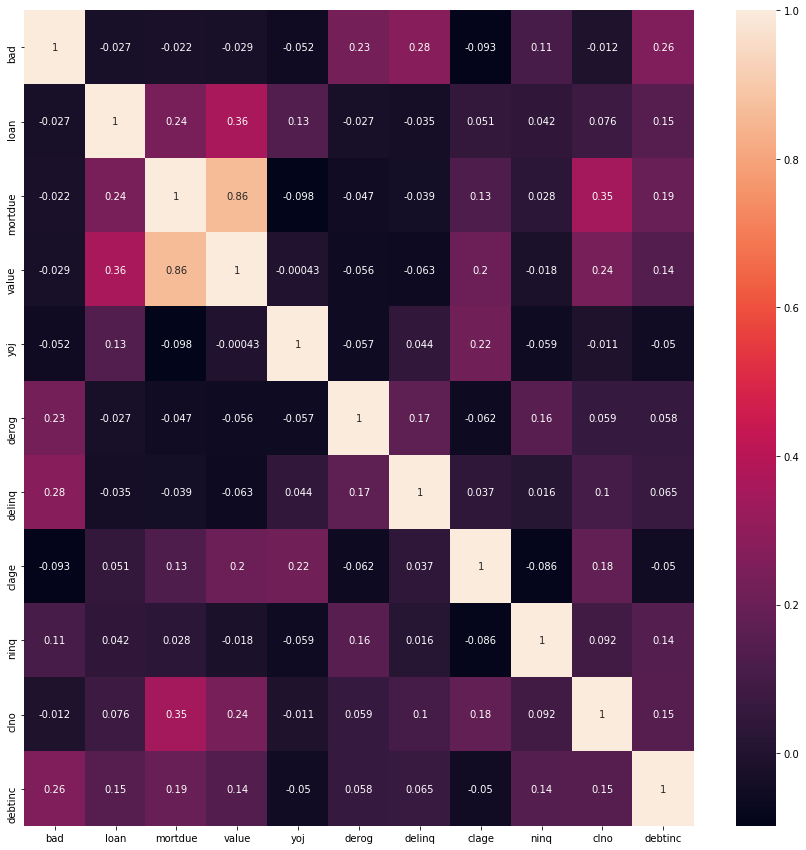

In [7]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(),annot=True)

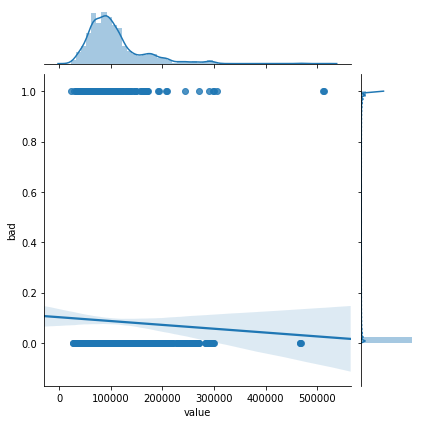

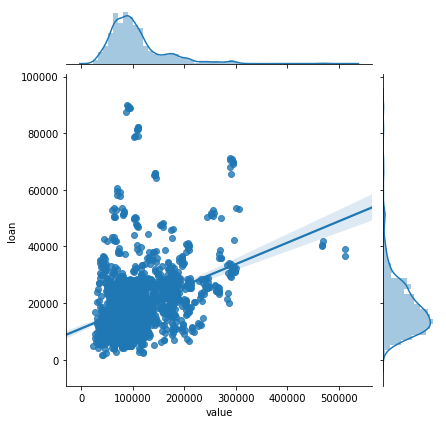

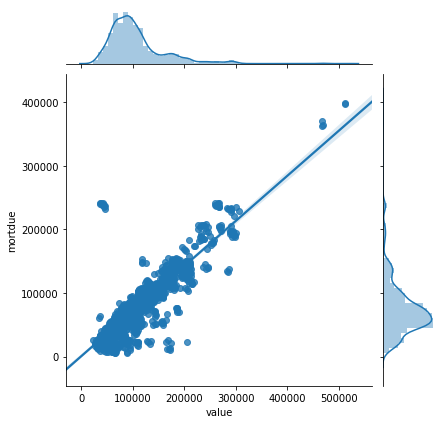

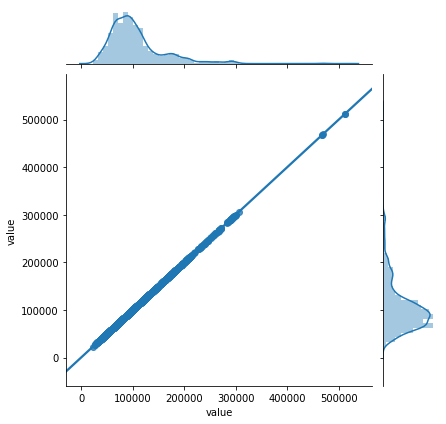

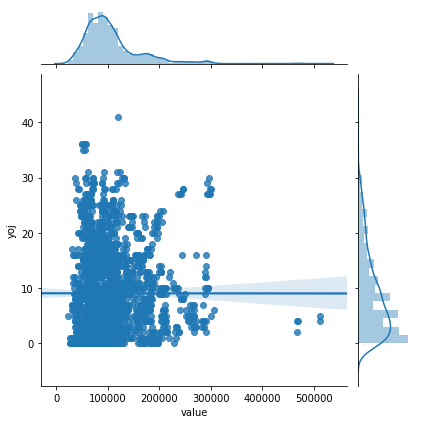

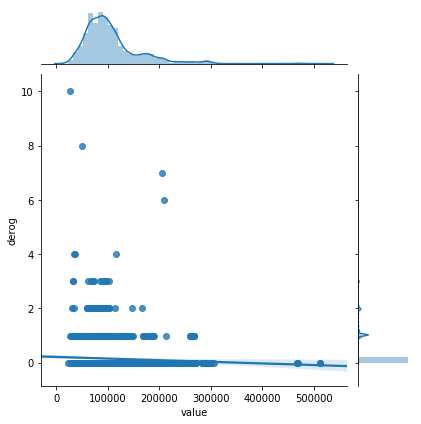

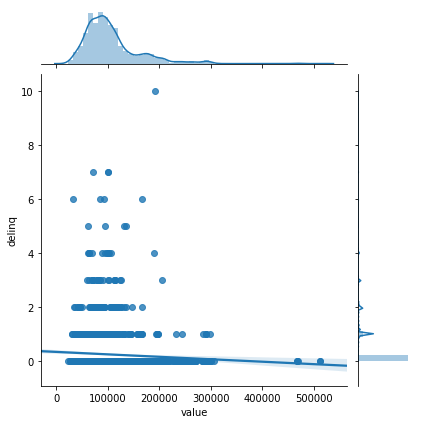

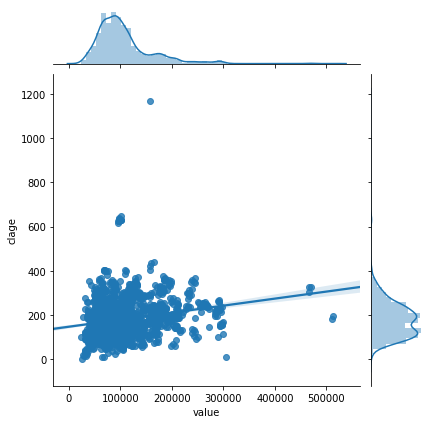

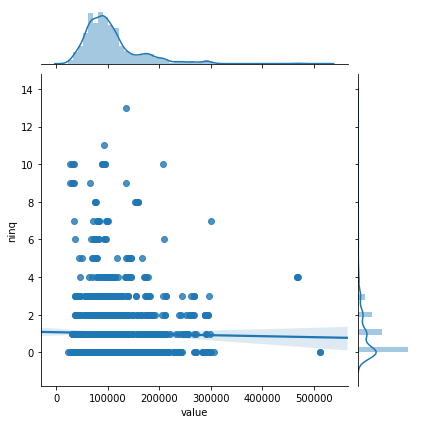

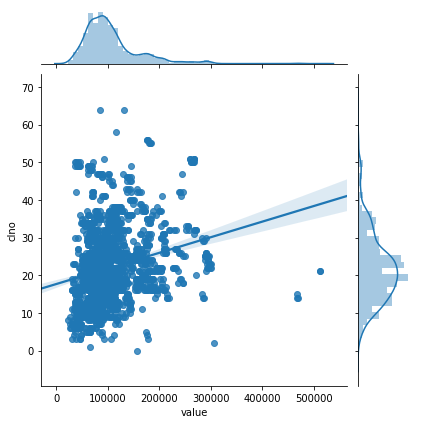

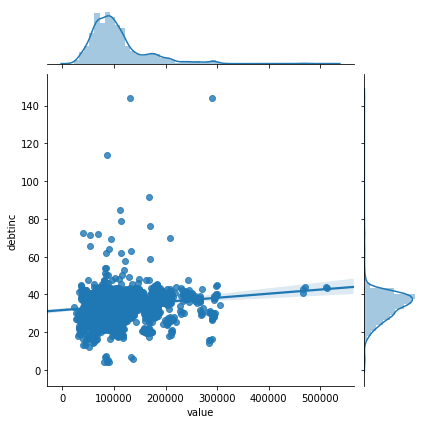

In [8]:
for i in range(len(data.columns)):
    sns.jointplot(x = data['value'],y = data[data.columns[i]],kind = 'reg')#mortandue ve loan ile iliskili oldugu gorunuyor.
    

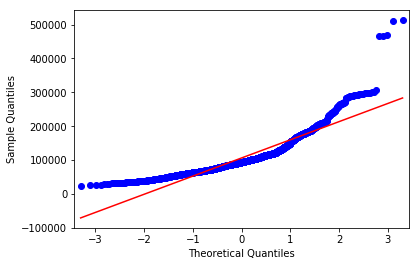

In [9]:
sm.qqplot(data['value'],line = 's');

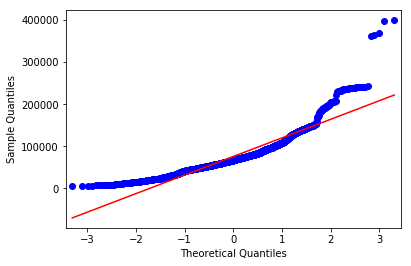

In [33]:
sm.qqplot(data['mortdue'],line = 's');

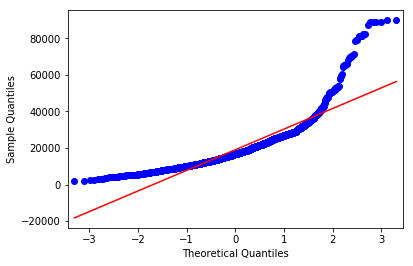

In [34]:
sm.qqplot(data['loan'],line = 's');

In [35]:
loan = sm.add_constant(data[['loan']])

C:\Users\numan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
y = data[['value']]

In [41]:
lm = sm.OLS(y,loan)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           3.10e-65
Time:                        19:32:23   Log-Likelihood:                -25760.
No. Observations:                2105   AIC:                         5.152e+04
Df Residuals:                    2103   BIC:                         5.154e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.39e+04   2139.067     34.546      0.000    6.97e+04    7.81e+04
loan           1.7048      0.097     17.666      0.000       1.516       1.894
==============================================================================
Omnibus:                      724.753   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.018
Skew:                           1.514   Prob(JB):                         0.00
Kurtosis:                       9.117   Cond. No.                     4.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
x = data[['loan','mortdue']]
x = sm.add_constant(x)
x.head()

,const,loan,mortdue
0,1.0,81200,18834.0
1,1.0,12600,103960.0
2,1.0,18000,46865.0
3,1.0,10300,57676.0
4,1.0,9400,56508.0


In [69]:
r_sq = []
for i in data.columns:
    y = data[['value']]
    x = sm.add_constant(data[[i]])
    lm = sm.OLS(y,x)
    model = lm.fit()
    r_sqrt = model.rsquared_adj
    r_sq.append(r_sqrt)
r_sq
r_sqrt = pd.DataFrame(data = r_sq ,index = data.columns )
r_sqrt.columns = ['Adj. R-squared']
r_sqrt

C:\Users\numan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,Adj. R-squared
bad,0.000371
loan,0.128816
mortdue,0.740039
value,1.000000
yoj,-0.000475
derog,0.002662
delinq,0.003457
clage,0.040591
ninq,-0.000147
clno,0.055289


In [10]:
loan = sm.add_constant(data[['loan']])
y = data[['value']]
lm = sm.OLS(y,loan)
model = lm.fit()
model.summary()




C:\Users\numan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           3.10e-65
Time:                        11:34:25   Log-Likelihood:                -25760.
No. Observations:                2105   AIC:                         5.152e+04
Df Residuals:                    2103   BIC:                         5.154e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.39e+04   2139.067     34.546      0.000    6.97e+04    7.81e+04
loan           1.7048      0.097     17.666      0.000       1.516       1.894
==============================================================================
Omnibus:                      724.753   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.018
Skew:                           1.514   Prob(JB):                         0.00
Kurtosis:                       9.117   Cond. No.                     4.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
mortdue = sm.add_constant(data[['mortdue']])
lm = sm.OLS(y,mortdue)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     5991.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:24:33   Log-Likelihood:                -24488.
No. Observations:                2105   AIC:                         4.898e+04
Df Residuals:                    2103   BIC:                         4.899e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.738e+04   1181.909     23.166      0.000    2.51e+04    2.97e+04
mortdue        1.0429      0.013     77.398      0.000       1.017       1.069
==============================================================================
Omnibus:                     1178.383   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65620.751
Skew:                          -1.880   Prob(JB):                         0.00
Kurtosis:                      30.093   Cond. No.                     1.74e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
predict = []
for i in range(len(y)):
    a = float(model.params[0])+x['loan'][i]*float(model.params[1])+x['mortdue'][i]*float(model.params[2])
    predict.append(a)

KeyError: 48

In [50]:
## Multivariate Regression

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict

In [51]:
data.columns

Index(['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage',
       'ninq', 'clno', 'debtinc'],
      dtype='object')

In [55]:
X = data[['loan','mortdue','debtinc']]

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [58]:
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     8390.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:57:39   Log-Likelihood:                -17171.
No. Observations:                1473   AIC:                         3.435e+04
Df Residuals:                    1470   BIC:                         3.436e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
loan           0.8969      0.065     13.806      0.000       0.769       1.024
mortdue        1.0115      0.017     59.818      0.000       0.978       1.045
debtinc      319.0672     48.059      6.639      0.000     224.796     413.338
==============================================================================
Omnibus:                     1184.993   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91004.619
Skew:                          -3.176   Prob(JB):                         0.00
Kurtosis:                      40.979   Cond. No.                     5.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
a="value = "
for i in range(len(model.params)):
    a=a+(str(model.params.index[i]) + "*" + '%.4f'%(model.params[i])+ " + ")
print(a)

vale = loan*0.8969 + mortdue*1.0115 + debtinc*319.0672 + 


 Leverage v.s. Studentized Residuals


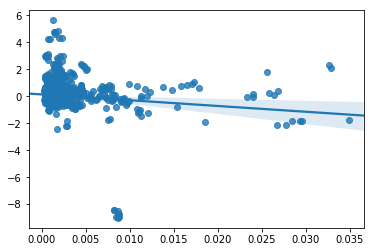

In [60]:
#detect outliers
# cooks distance kullanılacak
influence = model.get_influence()
resid_student = influence.resid_studentized_external
(cooks,p)=influence.cooks_distance
(dffits,p)=influence.dffits
leverage = influence.hat_matrix_diag

print( ' Leverage v.s. Studentized Residuals')
sns.regplot(leverage, model.resid_pearson, fit_reg=True)

plt.show()

In [65]:
model_predict=pd.concat([X, pd.Series(model.resid, name = "resid"),
                  pd.Series(model.predict(), name = "predict" )], axis=1)

In [67]:
model_predict.head()

,loan,mortdue,debtinc,resid,predict
0,81200.0,18834.0,34.042,NaN,92002.081004
1,12600.0,103960.0,34.479,-68.711719,133701.938111
2,18000.0,46865.0,26.354,-10688.660436,83464.239377
3,10300.0,57676.0,33.992,NaN,156733.364836
4,9400.0,56508.0,32.327,2457.464495,49622.312628


C:\Users\numan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\numan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


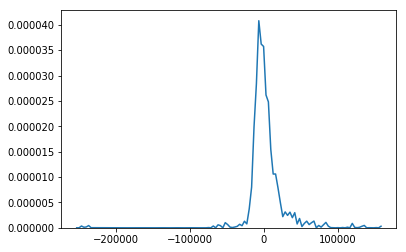

In [69]:
sns.kdeplot(np.array(model_predict.resid),bw=10,legend=True)
plt.show()

C:\Users\numan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\numan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\numan\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


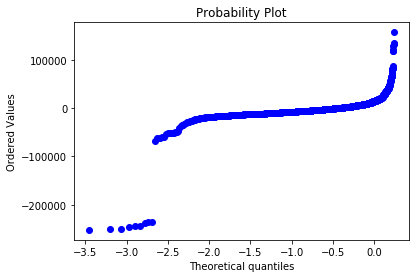

In [72]:
stats.probplot(model_predict.resid, dist="norm", plot=pylab)
pylab.show()

In [74]:
from scipy.stats import shapiro
stat, p = shapiro (model_predict.resid.dropna())

In [75]:
print('Statictics=%.3f, p=%.3f' %(stat,p))

alpha=0.5
if p >alpha:
    print('Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject)')  
else:
    print('Orneklem Normal (Gaussian) dağılım göstermemektedir, (Reject)')

Statictics=0.609, p=0.000
Orneklem Normal (Gaussian) dağılım göstermemektedir, (Reject)


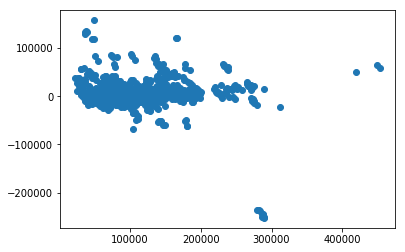

In [76]:
resid=model.resid
plt.scatter(model.predict(),resid)
plt.show()

In [78]:
##sklearn lineer regresion

In [82]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)
print(model.intercept_)
model.coef_


[26923.52925484]


array([[   0.78651144,    0.98492351, -308.59150894]])

In [90]:
model.predict(X_train)

array([[ 92801.14570932],
       [131428.51451776],
       [ 85416.66161291],
       ...,
       [144176.75085233],
       [ 79677.16220126],
       [128809.24653522]])

In [86]:
train_rmse = np.sqrt(mean_squared_error(y_train,model.predict(X_train)));print(train_rmse)

27251.097273207542


In [87]:
test_rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)));print(test_rmse)

22246.33943183453


In [93]:
print("Train RMSE: %.3f" %  train_rmse)
print("Test RMSE : %.3f" %  test_rmse)


Train RMSE: 27251.097
Test RMSE : 22246.339


In [94]:
model.score(X_train,y_train)

0.7413857148386807

In [97]:
cross_val_score(model,X_train,y_train, cv=10,scoring = "r2")

array([0.81755033, 0.6912151 , 0.8072673 , 0.63526593, 0.71542082,
       0.66687384, 0.59609922, 0.82881332, 0.55962514, 0.85023545])

In [98]:
cross_val_score(model,X_train,y_train, cv=10,scoring = "r2").mean()

0.7168366447009681

In [99]:
train_rmse = np.sqrt(-cross_val_score(model,X_train,y_train,cv=10, scoring="neg_mean_squared_error")).mean()
test_rmse = np.sqrt(-cross_val_score(model,X_test,y_test,cv=10, scoring="neg_mean_squared_error")).mean()
print("Train RMSE: %.3f" %  train_rmse)
print("Test RMSE : %.3f" %  test_rmse)

Train RMSE: 27194.708
Test RMSE : 21582.825
